In [ ]:
!pip install ultralytics
from ultralytics import YOLO
import torch
import ultralytics  # ✅ Make sure to import this!
# Print versions
print("PyTorch version:", torch.__version__)
print("Ultralytics YOLO version:", ultralytics.__version__)
from google.colab import files
from IPython.display import Image, display
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Run inference
results = model(img_path,conf=0.25)

# Plot and save the results to file
for r in results:
    im_array = r.plot()  # BGR numpy array with detections
    output_path = f"result_{img_path}"
    r.save(filename=output_path)  # save with bounding boxes

    # Display the saved image in Colab
    display(Image(filename=output_path))

In [ ]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO
import torch
from roboflow import Roboflow
import ultralytics  # ✅ Make sure to import this!
# Print versions
print("PyTorch version:", torch.__version__)
print("Ultralytics YOLO version:", ultralytics.__version__)



rf = Roboflow(api_key="Your API Key")
project = rf.workspace("avanegers").project("motorcycle-helmet-detection-8hf3j")
version = project.version(1)
dataset = version.download("yolov8")


In [ ]:
!ls Motorcycle-Helmet-Detection-1
!pip install ultralytics
from ultralytics import YOLO
import torch
import ultralytics
model = YOLO('yolov8n.pt')  # nano model for speed, change to yolov8s.pt for better accuracy

model.train(
    data='Motorcycle-Helmet-Detection-1/data.yaml',
    epochs=20,
    imgsz=640
)


In [ ]:
import os
from ultralytics import YOLO
from IPython.display import Image, display

# Evaluate validation metrics (optional)
metrics = model.val()
print(metrics)

# Define your test images folder
test_folder = 'Motorcycle-Helmet-Detection-1/test/images'

# Get list of image files
image_files = [f for f in os.listdir(test_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Loop through each image and run inference
for img_file in image_files:
    img_path = os.path.join(test_folder, img_file)

    # Run inference
    results = model(img_path)

    # Display and save results
    for r in results:
        im_array = r.plot()
        output_path = f"result_{img_file}"
        r.save(filename=output_path)
        display(Image(filename=output_path))




image 1/1 /content/Screenshot 2025-07-23 170637.png: 512x640 1 full-faced, 47.3ms
Speed: 12.7ms preprocess, 47.3ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 640)


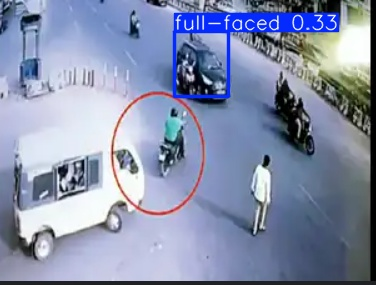

In [29]:
results = model('Screenshot 2025-07-23 170637.png')  # replace with your test image path

# Display results in Colab
from IPython.display import Image, display
for r in results:
    im_array = r.plot()
    output_path = 'result.jpg'
    r.save(filename=output_path)
    display(Image(filename=output_path))



In [17]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2123.3±258.8 MB/s, size: 118.0 KB)


val: Scanning /content/Motorcycle-Helmet-Detection-1/valid/labels.cache... 438 images, 1 backgrounds, 0 corrupt: 100%|██████████| 438/438 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:05<00:00,  5.58it/s]


                   all        438       1451      0.684      0.478      0.577      0.346
            full-faced        300        565      0.744      0.632      0.748      0.479
            half-faced        340        650      0.642      0.594      0.675      0.405
               invalid        140        159      0.739      0.427      0.534      0.353
             no helmet         63         77       0.61       0.26      0.349      0.148
Speed: 0.7ms preprocess, 2.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train43
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a3924582e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005, 


image 1/1 /content/Screenshot 2025-07-23 170637.png: 512x640 1 full-faced, 9.6ms
Speed: 2.8ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


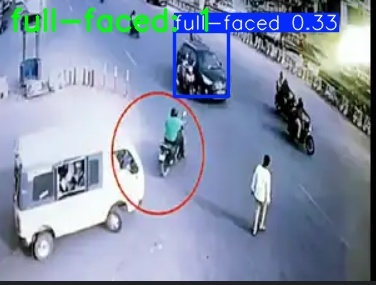

Object counts:
full-faced: 1


In [34]:
from ultralytics import YOLO
import cv2
from IPython.display import Image, display

# Load model
#model = YOLO('best.pt')  # replace with your trained model

# Run inference on image
results = model('Screenshot 2025-07-23 170637.png')

# Initialize counts
class_names = model.names
counts = {}

# Loop through results to count
for r in results:
    boxes = r.boxes
    for box in boxes:
        cls_id = int(box.cls[0])
        cls_name = class_names[cls_id]
        counts[cls_name] = counts.get(cls_name, 0) + 1

# Plot detections
for r in results:
    im_array = r.plot()

# Convert to OpenCV format and overlay counts
img_cv = im_array.copy()
y0, dy = 30, 30
font = cv2.FONT_HERSHEY_SIMPLEX

for i, (cls_name, count) in enumerate(counts.items()):
    text = f"{cls_name}: {count}"
    y = y0 + i * dy
    cv2.putText(img_cv, text, (10, y), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Save final image with counts overlayed
output_path = 'result_with_counts.jpg'
cv2.imwrite(output_path, img_cv)

# Display image in Colab
display(Image(filename=output_path))

# Print counts in console
print("Object counts:")
for cls_name, count in counts.items():
    print(f"{cls_name}: {count}")
